In [1]:
import numpy as np
import pandas as pd
import numpy.linalg as alg
import scipy as sp
import matplotlib.pyplot as plt

## (a) Data collection

In [2]:
data = pd.read_csv(r'C:\Users\kosta\Jupyter Notes\MATH5473\HW1\distance2.csv')
Data = np.array(data)
n = len(Data)
cities = np.array(data.columns)
print(data)

   Beijing  Shanghai  Guangzhou  Hongkong  Chengdu   London  Bangkok
0     0.00   1068.00    1890.00   1974.00  1516.00  8138.09  3297.79
1  1068.00      0.00    1206.63   1227.83  1658.00  9196.34  2886.89
2  1890.00   1206.63       0.00    129.07  1238.00  9497.75  1702.96
3  1974.00   1227.83     129.07      0.00  1369.30  9626.00  1725.68
4  1516.00   1658.00    1238.00   1369.30     0.00  8279.42  1916.29
5  8138.09   9196.34    9497.75   9626.00  8279.42     0.00  9532.18
6  3297.79   2886.89    1702.96   1725.68  1916.29  9532.18     0.00


## (b) MDS

In [3]:
def mds(D, dim=[]):
    H = -np.ones((n, n))/n
    H = -H.dot(D ** 2).dot(H)/2
    evals, evecs = alg.eigh(H)

    # Sort by eigenvalu in descending order
    idx = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:, idx]

    #Compute the coordinates using positive eigenvalued components only
    w, = np.where(evals > 0)
    if dim!=[]:
        arr = evals
        w = arr.argsort()[-dim:][::-1]
    if np.any(evals[w]<0):
        print('Error: Not enough positive eigenvalues for the selected dim.')
        return []
    L = np.diag(np.sqrt(evals[w]))
    V = evecs[:, w]
    Y = V.dot(L)
    return Y, evals, evecs

## (c) Eigenvalue Plot

Normed Eigenvalues are:
 [-1.20307317e-16 -2.31402840e-32  6.58540852e-65  1.05450821e-48
  4.44077060e-33  2.40614633e-17  1.00000000e+00]


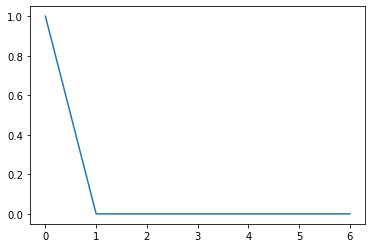

In [8]:
X2, eigen_values, eigen_vectors = mds(Data, dim=2)

normed_eigen_values = eigen_values/np.sum(eigen_values)
print("Normed Eigenvalues are:\n", normed_eigen_values)

plt.figure()
plt.plot([n-1-i for i in range(n)], normed_eigen_values)
plt.show()

## (d) Scatter Plot

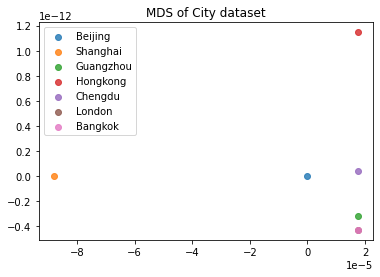

In [9]:
plt.figure()
for i in range(n):
    plt.scatter(X2[i, 0], X2[i, 1], alpha=.8, label=cities[i])
plt.legend()
plt.title('MDS of City dataset')
plt.show()

The graph basically reflect the position relationship: Bangkok is west of most cities. London is far away from those cities, so the scatter hasn't show up.